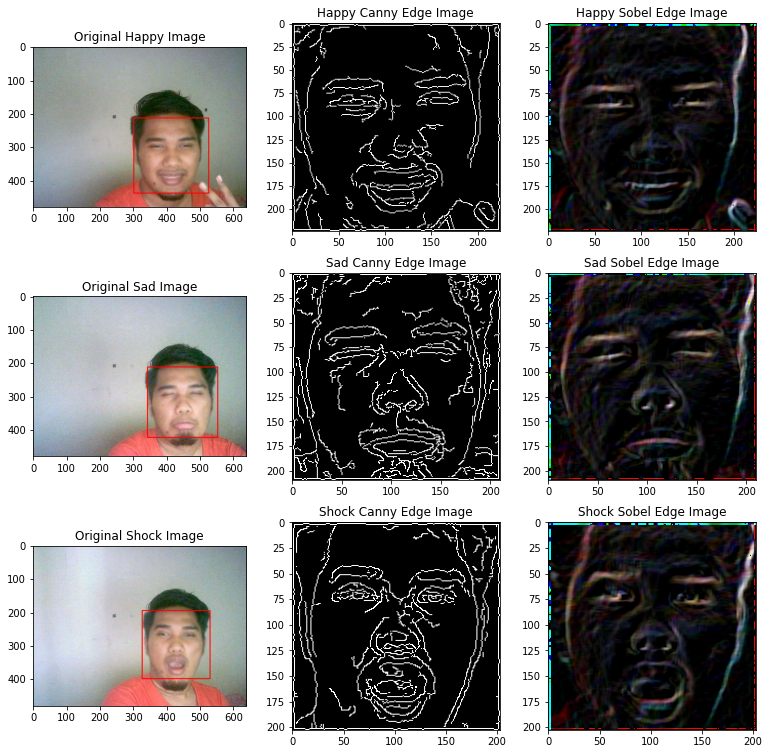

In [8]:
#import module
import cv2
import numpy as np
import matplotlib.pyplot as plt

#path directory
path= "/content/drive/MyDrive/Assignment Python/"

#open image
happyImg = cv2.imread(path+ "happy.jpg")
sadImg = cv2.imread(path+ "sad.jpg")
shockImg = cv2.imread(path+ "shock.jpg")

#convert image to RGB
happyImg = cv2.cvtColor(happyImg, cv2.COLOR_BGR2RGB)
sadImg = cv2.cvtColor(sadImg, cv2.COLOR_BGR2RGB)
shockImg = cv2.cvtColor(shockImg, cv2.COLOR_BGR2RGB)

#image for blur
happyImgBlur = np.copy(happyImg)
sadImgBlur = np.copy(sadImg)
shockImgBlur = np.copy(shockImg)

#initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt.xml")

#face bounding box coordinates using Haar Cascade
detections1 = face_cascade.detectMultiScale(happyImg)
detections2 = face_cascade.detectMultiScale(sadImg)
detections3 = face_cascade.detectMultiScale(shockImg)

#blurr image 1
for face in detections1:
  x,y,w,h = face
  #blur happy image
  happyImgBlur[y:y+h,x:x+w] = cv2.GaussianBlur(happyImgBlur[y:y+h,x:x+w],(5,5),cv2.BORDER_DEFAULT)
  cv2.rectangle(happyImgBlur,(x,y),(x+w,y+h),(255,0,0),2)
  # canny edge detection
  imgHappyCanny = cv2.Canny(happyImgBlur[y:y+h,x:x+w],20,70) 
  # sobel edge detection
  sobelx = cv2.Sobel(happyImgBlur[y:y+h,x:x+w], cv2.CV_8U,1,0,ksize=3)
  sobely = cv2.Sobel(happyImgBlur[y:y+h,x:x+w], cv2.CV_8U,0,1,ksize=3)
  imgHappySobel = sobelx + sobely

#blurr image 2
for face in detections2:
  x,y,w,h = face
  #blur sad image
  sadImgBlur[y:y+h,x:x+w] = cv2.GaussianBlur(sadImgBlur[y:y+h,x:x+w],(5,5),cv2.BORDER_DEFAULT)
  cv2.rectangle(sadImgBlur,(x,y),(x+w,y+h),(255,0,0),2)
  # canny edge detection
  imgSadCanny = cv2.Canny(sadImgBlur[y:y+h,x:x+w],20,70) 
  # sobel edge detection
  sobelx = cv2.Sobel(sadImgBlur[y:y+h,x:x+w], cv2.CV_8U,1,0,ksize=3)
  sobely = cv2.Sobel(sadImgBlur[y:y+h,x:x+w], cv2.CV_8U,0,1,ksize=3)
  imgSadSobel = sobelx + sobely

#blurr image 3
for face in detections3:
  x,y,w,h = face
  #blur shock image 
  shockImgBlur[y:y+h,x:x+w] = cv2.GaussianBlur(shockImgBlur[y:y+h,x:x+w],(5,5),cv2.BORDER_DEFAULT)
  cv2.rectangle(shockImgBlur,(x,y),(x+w,y+h),(255,0,0),2)
  # canny edge detection
  imgShockCanny = cv2.Canny(shockImgBlur[y:y+h,x:x+w],20,70)
  # sobel edge detection
  sobelx = cv2.Sobel(shockImgBlur[y:y+h,x:x+w], cv2.CV_8U,1,0,ksize=3)
  sobely = cv2.Sobel(shockImgBlur[y:y+h,x:x+w], cv2.CV_8U,0,1,ksize=3)
  imgShockSobel = sobelx + sobely

#display image
plt.figure(figsize=[13,13])
plt.subplot(331);plt.imshow(happyImgBlur, cmap="gray");plt.title("Original Happy Image");
plt.subplot(332);plt.imshow(imgHappyCanny, cmap="gray");plt.title("Happy Canny Edge Image");
plt.subplot(333);plt.imshow(imgHappySobel, cmap="gray");plt.title("Happy Sobel Edge Image");
plt.subplot(334);plt.imshow(sadImgBlur, cmap="gray");plt.title("Original Sad Image");
plt.subplot(335);plt.imshow(imgSadCanny, cmap="gray");plt.title("Sad Canny Edge Image");
plt.subplot(336);plt.imshow(imgSadSobel, cmap="gray");plt.title("Sad Sobel Edge Image");
plt.subplot(337);plt.imshow(shockImgBlur, cmap="gray");plt.title("Original Shock Image");
plt.subplot(338);plt.imshow(imgShockCanny,cmap="gray");plt.title("Shock Canny Edge Image");
plt.subplot(339);plt.imshow(imgShockSobel, cmap="gray");plt.title("Shock Sobel Edge Image");